# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

## Open the data file and study the general information. 

  To start analyse our project to configure out which factor influence the vehicle price we should see what factors do we have how much index ?

In [1]:
#import the pandas lib and the plot nummpy and seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt


data = pd.read_csv('/datasets/vehicles_us.csv')
print(data.shape)
data.info()
data

(51525, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


### Conclusion

we are dealing with Crankshaft List our collected data has __13 columns__ divided to quantitative and qualitative 
and **51525 index**

</br>

we have collected these values for 51525 vehicale
</br>

- price
- model_year 
- model
- condition
- cylinders
- fuel
- odometer
- transmission
- type
- paint_color
- is_4wd	
- date_posted	
- days_listed
</br>

However we need to determine which of these factors influence the price of a vehicle.

## Data preprocessing

# Missing value

In [2]:
# we want to figure out which factors have null values using isnull() and count them 
print(data.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


as we apply isnull function to deteremine which columns have missing values therefore we have 5 columns containing model_year cylinders odometer paint_color is_4wd have missing values with different summation
our missing values 
- 3619 in model_year column
- 5260 of cylinders
- 7892 odometer
- 9267 paint color
- 25953 is_4wd
we need a proper data to start analysis
so lets study every column which have missing values


In [3]:
# using describe method to have a look in general of the collected data
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


we have **4** quantitative columns **( model_year,cylinders,odometer,is_4wd)** containg missing values
while quanitative column is  **fuel , transmission , type , paint_color** the only one having missing values is the **paint color** column


# Qualitative data

First look 


1. Price

From the describe method we can see that we have min price =1 and that's impossible the standard deviation relative to the mean its lower than the mean so there isn't much dispertion in the data and the max price is 375 thousands


2. model year 

we have car from 1908 model which is not anymore availble and the max is 2019 most of the cars are 2009 model the std is very low thats mean we have a lot of dispertion in the data


3. cylinders 

most of the cars have four, six, or eight cylinders. Generally, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy despite of the motorcycle and vehicale which have one wheel work on 1 
cylinder 

4. is_4wd


the min and max value equals to one(True) means that most of them are 4 wheel vehicle but half of the data are missed thus its  significant data so we are not goiung to fill it up and get back to the data engineer


5. odometer


the min value is 0 and that's impossible at least the car have 5-6 miles for transportation for a new car


# Price

In [4]:
data['price'].value_counts().sort_values()
one_price = (data[data['price'] == 1 ].count() / len(data))*100
one_price
#data = data.drop(data[data['price'] == 1 ].index)
#data['price'].describe()
#low_price = data[data['price'] <= 2000 ].count()
#low_price

price           1.548763
model_year      1.447841
model           1.548763
condition       1.548763
cylinders       1.410966
fuel            1.548763
odometer        1.310044
transmission    1.548763
type            1.548763
paint_color     1.255701
is_4wd          1.292576
date_posted     1.548763
days_listed     1.548763
dtype: float64

we have 798 car have price = 1 and that's impossible unless its a toy calculating the rate of the 1 price equals to 1.5% which we can drop them but we are going to consider them as outliers and filter the data with the realistic prices so we can drop them or filter the data it's better to filter it so we are going to loose the orignal one 

# Cylinder 

In [5]:
print(data['cylinders'].value_counts())
data['cylinders'] = data['cylinders'].fillna(data.groupby(['model'])['cylinders'].transform('median'))
data['cylinders'].isnull().sum()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64


0

- old description : most of the vehicale has 4-8 cylinderes so filling the missing values with the mean which is 6

# Model year 

everything seems realistic in the model year but we have missing values so we are going to fill it according to its model but we have diffrent years to the same model so we are going to take the most common year for each model add fill the missing value of the model_year column by mode()

In [6]:
#we grouped the data by the model and save the most common year for each model to a new series called year 
# then we used the yearr func to fill the null values in the model year 
year = data.groupby(['model'])['model_year'].agg(lambda x : x.mode()[0])
def yearr(row):
    y = row['model_year']
    if pd.isnull(y):
        return year[row['model']]
    else:
        return row['model_year']
    #apply the func on the model year column
data['model_year']=data.apply(yearr , axis=1)
# calculate the null again 
data['model_year'].isnull().sum()

0

# Odometer 

In [7]:
#odometer depends on the condition but the best way to replace the missing value is with model and model year 
data['odometer'] = data.groupby(['model','model_year'])['odometer'].transform(lambda x : x.fillna(np.mean(x)))
data['odometer']

0        145000.0
1         88705.0
2        110000.0
3        175165.5
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524    105229.2
Name: odometer, Length: 51525, dtype: float64

replacing the missing values with transform method by the median based on the model and model year 

#  is_4wd

In [8]:
rate_wheels = (data['is_4wd'].isnull().sum() / len(data))*100
print(rate_wheels)
#data['is_4wd'] = data['is_4wd'].fillna(0)
data['is_4wd'].replace(to_replace = np.nan, value = 0 , inplace=True)
data['is_4wd'].unique()

50.36972343522562


array([1., 0.])

Half of the data in is_4wd column has significant missing values so we can not replace it with anything

# Qauntitative data

In [9]:
print(data['paint_color'].value_counts())
#data['paint_color'] = data['paint_color'].fillna('others')
#data['paint_color'].value_counts()
paint = data.groupby('model')['paint_color'].agg(lambda x:x.mode()[0])
def painter(row):
    y = row['paint_color']
    if pd.isnull(y):
        return paint[row['model']]
    else:
        return row['paint_color']
    #apply the func on the model year column
data['paint_color']=data.apply(painter , axis=1)
data['paint_color'].isnull().sum()


white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64


0

paint_color does affect the price where the less demands car color have lower price (yellow , orange,purple) and the high demamd is white black and silver so we can replace the missing values with other we will check the price with the paint color of a vehicale LATER


The count of others in the paint color column is 9116 

That's mean that there's a demand around the other paint color (mthe missed value)

# Conclusion

The most important part to start dealing with data is to preprocesse it to fill in the missing values as we saw we have the pint color column we fill the value with others on the other hand we filled the quantitave areas with mode mean and median methods based on the model and the model year .

# Changing data types

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      51525 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       51525 non-null float64
fuel            51525 non-null object
odometer        51442 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     51525 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


- model_year should be integer because when we are dealing with years there is no float number we can't say 2018.1 its 2018
- cylinder should be integer the vehicale has a comlete cylinder not cylinder and a hlaf so same here we are dealing with integers
- date_posted should be date time 
- odometer should be nummerical value not object because we are dealing with numbers

In [11]:
#data['date_posted'] = pd.to_datetime(data['date_posted'])
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['odometer'] = data['odometer'].astype(float)

# Make calculations and add them to the table

In this chapter we are going to add some specific columns using some calculationS like the age of the vehicle , the year of the ads posted...etc

In [12]:
#adding new column with writing the day month and year sub name of the day
data['new_date_ad_published_week'] = pd.to_datetime(data['date_posted']).dt.week
data['new_date_ad_published_month'] = pd.to_datetime(data['date_posted']).dt.month
data['new_date_ad_published_year'] = pd.to_datetime(data['date_posted']).dt.year

#adding a column tell us the age of the vehivle until the ad have been posted
data['age_vehicle'] = (pd.DatetimeIndex(data['date_posted']).year) - data['model_year']
data['age_vehicle'].describe()
data['age_vehicle'].unique()
data['new_date_ad_published_month']

0         6
1        10
2         2
3         3
4         4
         ..
51520    10
51521    11
51522    11
51523     7
51524     6
Name: new_date_ad_published_month, Length: 51525, dtype: int64

In [13]:
#calculating the average of the mileage per year
#data['avg_per_year_mileag'] = data.groupby(['model','model_year'])['odometer'].transform('mean')
try:
    data['avg_per_year_mileag'] = data['odometer'] / data['age_vehicle']
except:
    data['avg_per_year_mileag'] = data['odometer'] / (data['new_date_ad_published_month']/12)
data['avg_per_year_mileag']

0        20714.285714
1        17741.000000
2        18333.333333
3        10947.843750
4        40451.500000
             ...     
51520    17627.200000
51521    11343.750000
51522    14222.222222
51523    27914.600000
51524    26307.300000
Name: avg_per_year_mileag, Length: 51525, dtype: float64

In [14]:
data['avg_per_year_mileag'] = data['odometer'] / data['age_vehicle']

we add three columns 
1. new_date_ad_published -- contains the same date of the ad have been posted but with the day wrtitten in subword
2. **i have been deleted this column year_posted -- when the ad have been posted in which year 2018 or 2019**
3. age_vehicle -- the age of the vehicle to determine which vehicle could be driven or just sell its pieces 
4. data['avg_per_year_mileage'] average of mileage per year for each vehicle's 





In [15]:
pd.to_datetime(data['date_posted']).dt.year

0        2018
1        2018
2        2019
3        2019
4        2019
         ... 
51520    2018
51521    2018
51522    2018
51523    2018
51524    2018
Name: date_posted, Length: 51525, dtype: int64

***Replacing condition column with new values***

In [16]:
data['condition'].replace({'new':5 ,'like new':4 , 'excellent':3 , 'good' : 2 , 'fair':1 , 'salvage' : 0},inplace=True )
data['condition'] = pd.to_numeric(data['condition'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
price                          51525 non-null int64
model_year                     51525 non-null int64
model                          51525 non-null object
condition                      51525 non-null int64
cylinders                      51525 non-null int64
fuel                           51525 non-null object
odometer                       51442 non-null float64
transmission                   51525 non-null object
type                           51525 non-null object
paint_color                    51525 non-null object
is_4wd                         51525 non-null float64
date_posted                    51525 non-null object
days_listed                    51525 non-null int64
new_date_ad_published_week     51525 non-null int64
new_date_ad_published_month    51525 non-null int64
new_date_ad_published_year     51525 non-null int64
age_vehicle                    51525 non-null int

convert condiotion to numeric so we are going to use to_numeric method 

# Conclusion

- we changed the column to its data type numeric values to integer or float date to datetime type
- adding an imporatnt columns like 
<ul><li>the age of the car
    <li> the year when the ad have being published as we saw there is just two years 2018,2019 </li>
    <li>date with the sub word of the day </li> </li></ul>
    
    
- we convert the condition to numeric values instead of string values

# Carry out exploratory data analysis EDA

# Histogram

# Price

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64
lower outlier -12758.5 upper outliers 34597.5


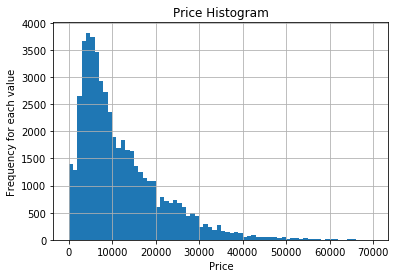

In [17]:
data['price'].hist(bins=70 , range=(0,70000) )
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency for each value')
#data['price'].hist(bins=70 , range=(0,10000))
print(data['price'].describe())
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)

From the hisogram of the price we can see that the price range from 1 to 375K 

the zero price is not real even if ir was broken car its price will not be zero so it's considered as an outliers from 1 to 2000


th price have one peak around 6000 and the distribution of the price seems to be the most between 2500 to 400000 there is such little data beyond the 40000 

the sekweness of the data seems to be to the right means that the higher price means less demands


the price average around 12132 and the median 9000 means that the distribution is around the average 

we don't have **mild outlier** price under -12758


but we have **upper outlier** which is all the values above the 34597

# Condition

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
lower outlier 0.5 upper outliers 4.5


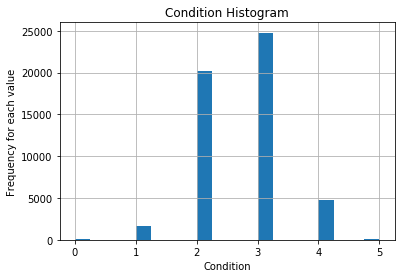

In [18]:
data['condition'].hist(bins=20, range=(0,5))
plt.title('Condition Histogram')
plt.xlabel('Condition')
plt.ylabel('Frequency for each value')
print(data['condition'].describe())
q1 = data['condition'].quantile(0.25)
q3 = data['condition'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)

Most of the vehicle are having 2 to 4 (excellent to fair)
most of the vehicle condition have a value of 3 approx thus half of the data have a good vehicle


it has one peak around 3 (good) almost symmetric there's less vehicle with 0 ,1 ,4,5 condition comparing to the 2 and 3 which almost have the wholde data

(25000+20000) = 45000 the rest is 6000 of the data


so the data less than 0.5 considered to be **mild outlier** and above 4.5 which is 5 cylinders considered to be **upper outlier** 


**mild outlier = 0**


**upper outlier = 5**

# Age vehicle

count    51525.000000
mean         8.436429
std          6.158509
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age_vehicle, dtype: float64
lower outlier -8.0 upper outliers 24.0


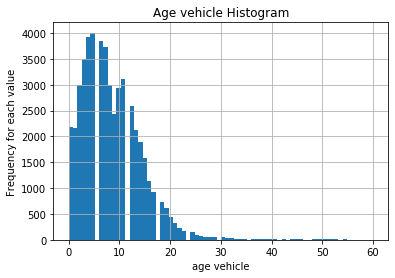

In [19]:
data['age_vehicle'].hist(bins=70 , range=(0,60))
plt.title('Age vehicle Histogram')
plt.xlabel('age vehicle')
plt.ylabel('Frequency for each value')
print(data['age_vehicle'].describe())
q1 = data['age_vehicle'].quantile(0.25)
q3 = data['age_vehicle'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)

the age of vehicle is when the ad was published it leads that if we have less age leads to a newer vehicle 


***0 means the vehicale of the year***


Most of the vehical age is between **0 to 15** but according to the law the maximum age is 12 so the age above 12 are outliers despite of the upper outlier is 24 the age of a car from 0 to 110 most of vehicles ages around 8 and the median 7 so the values distributed the most between 4-12 years 


the sekweness of the data is to the left as we can see more ages means less vehicale count demands no one will by a car more than 24 years old maybe to not use but for the pieces inside the car

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
lower outlier -2.0 upper outliers 14.0


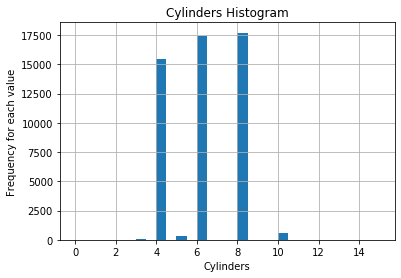

In [20]:
data['cylinders'].hist(bins=30 , range=(0,15))
plt.title('Cylinders Histogram')
plt.xlabel('Cylinders')
plt.ylabel('Frequency for each value')
print(data['cylinders'].describe())
q1 = data['cylinders'].quantile(0.25)
q3 = data['cylinders'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)

most of the vehicale have 4 , 6,8 cyliders but here we have **no outliers**


**25%** of the data have 4 the median 6


**75%** of the data have 8 we have one around around 6


its a **symmetric histogram** the range of the cylinders from 3 to 12 

count     51442.000000
mean     115531.705092
std       62422.090210
min           0.000000
25%       72624.205128
50%      114468.538874
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64
lower outlier -47939.48717948719 upper outliers 273563.6923076923


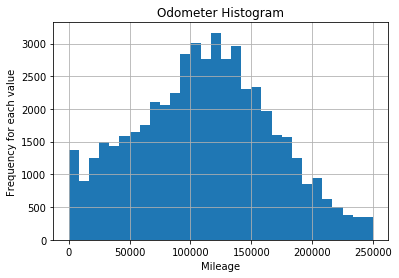

In [21]:
data['odometer'].hist(bins=30 , range=(0,250000))
plt.title('Odometer Histogram')
plt.xlabel('Mileage')
plt.ylabel('Frequency for each value')
print(data['odometer'].describe())
q1 = data['odometer'].quantile(0.25)
q3 = data['odometer'].quantile(0.75)
iqr = (q3 -q1)*1.5
lo = q1 - iqr
uo = q3 + iqr
print('lower outlier',lo ,'upper outliers', uo)

**lower the mileage------> higher the price-------> newer the vehicle**


this histogram looks like the price histogram 
 we don't have **mild outlier** mileage under -47939
 
we have 0 mileage its unreal because for a new car for about 5 to 10 miles considered as the transporation miles thus we are going to consider vehicals less than 5 as an outliers 


but we have **upper outlier** which is all the values above the 273564


the sekweness to the left we have two peaks around 110000 and 150000 the higher the mileage lower the counts of the vehicale because it becomes unusefull car 



# Filtering data 


In [22]:
condition_f=  data.query('condition == 0 or condition == 5 ')
#mil_price = data.pivot_table(index='model',values='filt_condition')
rate_cond = (len(condition_f)/len(data))*100
rate_cond

0.5007278020378457

we will save the outlier for the condition factor in a new dataFrame

In [23]:

age_f=  data.query('age_vehicle > 24')  
#table_age = data.pivot_table(index='model',values='filter_age')
rate_age = (len(age_f)/len(data))*100
rate_age

1.4303736050460942

we will save the outlier for the age_vehicle factor to a new dataFrame

In [24]:
price_f =  data.query('price > 34598 or odometer > 34598' )
rate_price = (len(price_f)/len(data))*100
#its look like the same mileage and price for all data 
rate_price

91.27413876758855

we will save the outlier for the price and mileage becasuse they containg almost the same data in a new dataFrame

In [25]:
filter_table = data.query('not(condition == 0 or condition == 5) and not(age_vehicle > 24) and not(price > 34598 )and not( odometer <= 5 or odometer > 273564 )')
filter_table

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,new_date_ad_published_week,new_date_ad_published_month,new_date_ad_published_year,age_vehicle,avg_per_year_mileag
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,SUV,black,1.0,2018-06-23,19,25,6,2018,7,20714.285714
1,25500,2013,ford f-150,2,6,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50,42,10,2018,5,17741.000000
2,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79,6,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,175165.500000,automatic,pickup,white,0.0,2019-03-22,9,12,3,2019,16,10947.843750
4,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28,14,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,3,4,gas,52727.307692,automatic,coupe,grey,0.0,2018-11-24,89,47,11,2018,3,17575.769231
51520,9249,2013,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37,40,10,2018,5,17627.200000
51522,3950,2009,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32,46,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71,27,7,2018,5,27914.600000


we have made a new dataFrame called filter_table that has the filtered data without the outliers 

# Histogram without outliers

count     48167.000000
mean     115690.498381
std       55789.445357
min           6.000000
25%       76176.827586
50%      116000.000000
75%      152739.818182
max      273526.000000
Name: odometer, dtype: float64


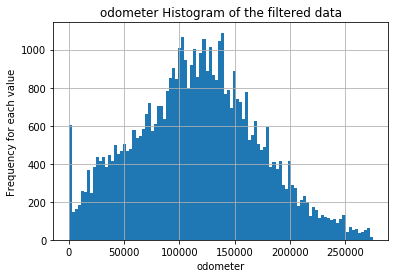

In [26]:
filter_table['odometer'].hist(bins=100 , range=(0,275000))
plt.title('odometer Histogram of the filtered data')
plt.xlabel('odometer')
plt.ylabel('Frequency for each value')
print(filter_table['odometer'].describe())


count    48184.000000
mean         8.173979
std          5.105826
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         24.000000
Name: age_vehicle, dtype: float64


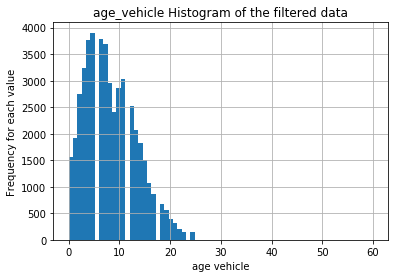

In [27]:
filter_table['age_vehicle'].hist(bins=70 , range=(0,60))
plt.title('age_vehicle Histogram of the filtered data')
plt.xlabel('age vehicle')
plt.ylabel('Frequency for each value')
print(filter_table['age_vehicle'].describe())

count    48184.000000
mean         2.635169
std          0.682191
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: condition, dtype: float64


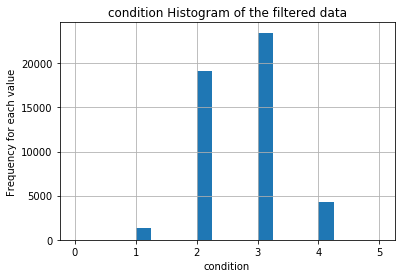

In [28]:
filter_table['condition'].hist(bins=20 , range=(0,5))
plt.title('condition Histogram of the filtered data')
plt.xlabel('condition')
plt.ylabel('Frequency for each value')
print(filter_table['condition'].describe())

count    48184.000000
mean     11229.949319
std       7820.654957
min          1.000000
25%       4999.000000
50%       8995.000000
75%      15990.000000
max      34595.000000
Name: price, dtype: float64


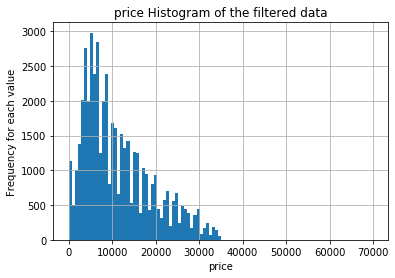

In [29]:
filter_table['price'].hist(bins=100 , range=(0,70000))
plt.title('price Histogram of the filtered data')
plt.xlabel('price')
plt.ylabel('Frequency for each value')
print(filter_table['price'].describe())

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Frequency for each value')

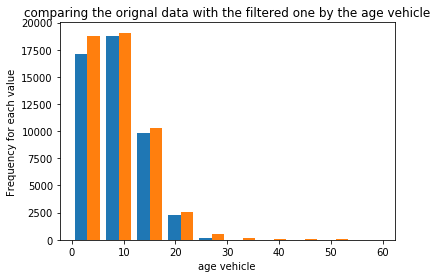

In [30]:
plt.hist([filter_table['age_vehicle'],data['age_vehicle']],bins=10  ,  range=(0,60))
plt.title('comparing the orignal data with the filtered one by the age vehicle')
plt.xlabel('age vehicle')
plt.ylabel('Frequency for each value')

Text(0, 0.5, 'Frequency for each value')

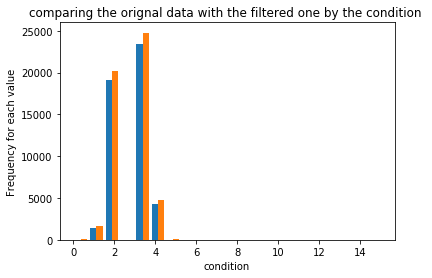

In [31]:
plt.hist([filter_table['condition'],data['condition']],bins=20  ,  range=(0,15))
plt.title('comparing the orignal data with the filtered one by the condition ')
plt.xlabel('condition')
plt.ylabel('Frequency for each value')

Text(0, 0.5, 'Frequency for each value')

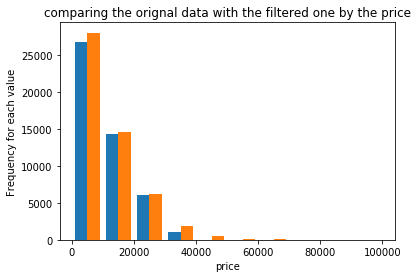

In [32]:
plt.hist([filter_table['price'],data['price']],bins=10  ,  range=(0,100000))
plt.title('comparing the orignal data with the filtered one by the price')
plt.xlabel('price')
plt.ylabel('Frequency for each value')

Text(0, 0.5, 'Frequency for each value')

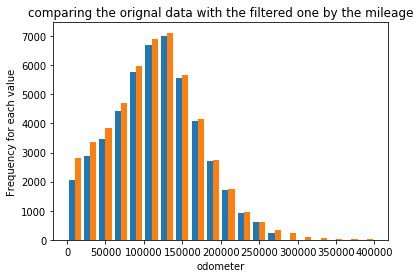

In [33]:
plt.hist([filter_table['odometer'],data['odometer']],bins=20  ,  range=(0,400000))
plt.title('comparing the orignal data with the filtered one by the mileage')
plt.xlabel('odometer')
plt.ylabel('Frequency for each value')

# Days_listed (mean , median)

count    48184.000000
mean        39.544019
std         28.224582
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


,mean,median
model,,
acura tl,40.320513,34.5
bmw x5,42.015209,34.0
buick enclave,39.037037,33.0
cadillac escalade,41.794326,35.0
chevrolet camaro,38.702997,33.0
...,...,...
toyota sienna,39.275542,33.0
toyota tacoma,39.017880,34.0
toyota tundra,38.201413,32.0


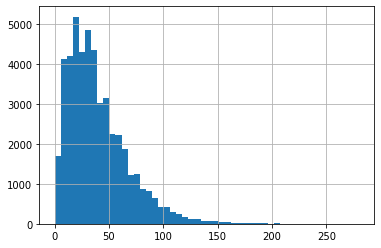

In [34]:
print(filter_table['days_listed'].describe())
filter_table['days_listed'].hist(bins=50 , range=(0,280))
days = filter_table.pivot_table(index='model' ,values='days_listed',aggfunc={'mean' , 'median'})
days

so the range of the days listed from 0 to 271 having an average of 39 

**50% the data have value equals to 33 

**75% of the data aroung 53 


**25% of th data 19

from the hisotgram we have **wild peak** from 10 to 40 days

the count of the vehicale days are lesser as the sekweness continue to the left that's mean the vehicle with ((**higher price and high mileage have----> more days listed** ))

because they are not on demand so they make there appear on the website more in case that anyone would buy them


However the typical life time is around 30-40 days 

the **mean and median** value almost the same so that means most of the days listed distributed within the same area 


there is no zero days at least it will be one day 



**Calculating the number ads and the average price for each model**

In [35]:
s = filter_table.pivot_table(index='type' , values='price' )

y=filter_table.pivot_table(index='type' , values='date_posted' ,aggfunc='count')
ad_table = s.merge(y , on ='type')
ad_table.columns=['average price','number of ads']
ad_table

,average price,number of ads
type,,
SUV,10452.556763,11874
bus,17445.913043,23
convertible,12853.660969,351
coupe,13509.459701,2010
hatchback,6830.216867,996
mini-van,8032.268357,1144
offroad,14292.989071,183
other,10541.278970,233
pickup,15010.681552,6315


Here we made two tables and then merge them together according to the model type 
* First Table - includes the average price for each model


* Second Table - includes the number od ads for each model based on the date posted for example : for the bmv12 model we had posted on 01/02/2018 and on 08/06/2019 we have posted for the same type another time so calculating how many times we have posted it , it counts two times the ad have been posted for bmv12 

# Correlation

we are going to calculate the correlation between the price and different factors 

In [36]:
filter_table['price'].corr(filter_table['age_vehicle'])

-0.5059559184617649

the relation between the price and the age_vehicle is negative it make sense 

**high price ------> less age**
**low price -------> older age**

example new car (1 year) have a higher price than new car but an old version 

In [37]:
filter_table['price'].corr(filter_table['condition'])

0.18303991501782624

the relation between the price and the condition = 0.18 almost zero  


so the condition of the car doesn't really affect the price **neutral correlation**


From my point of vieew hat the condition does affect the price of the vehicle if we buy a new car for the same model for sure it will have higher price than the vehivle with good condition

In [38]:
filter_table['price'].corr(filter_table['cylinders'])

0.31008589038506573

the relation between the price and the cylinders = 0.28 almost zero  

lets see first what the cylinder is :


**A cylinder is the power unit of an engine; it's the chamber where the gasoline is burned and turned into power. ... Generally, an engine with more cylinders produces more power, while an engine with fewer cylinders gets better fuel economy**

so the cylinders doent really affect the price but it does affect the engine **neutral correlation**

In [39]:
filter_table['price'].corr(filter_table['model_year'])

0.5078978439751313

the relation between the price and the model = 0.5 considered as **positive correlation** 

the model year affect the price **the newer version ------->> the higher price**

In [40]:
filter_table['odometer'].corr(filter_table['model_year'])

-0.5947205834872192

the relation between the price and the mileage = -0.5 considered as **negative correlation** 

the mileage affect the price **the lower odometer ------->> the higher price**


new car with 6 miles passed the price for ir will be very high

# Scatterplot for quantitative data assosiaction with the price

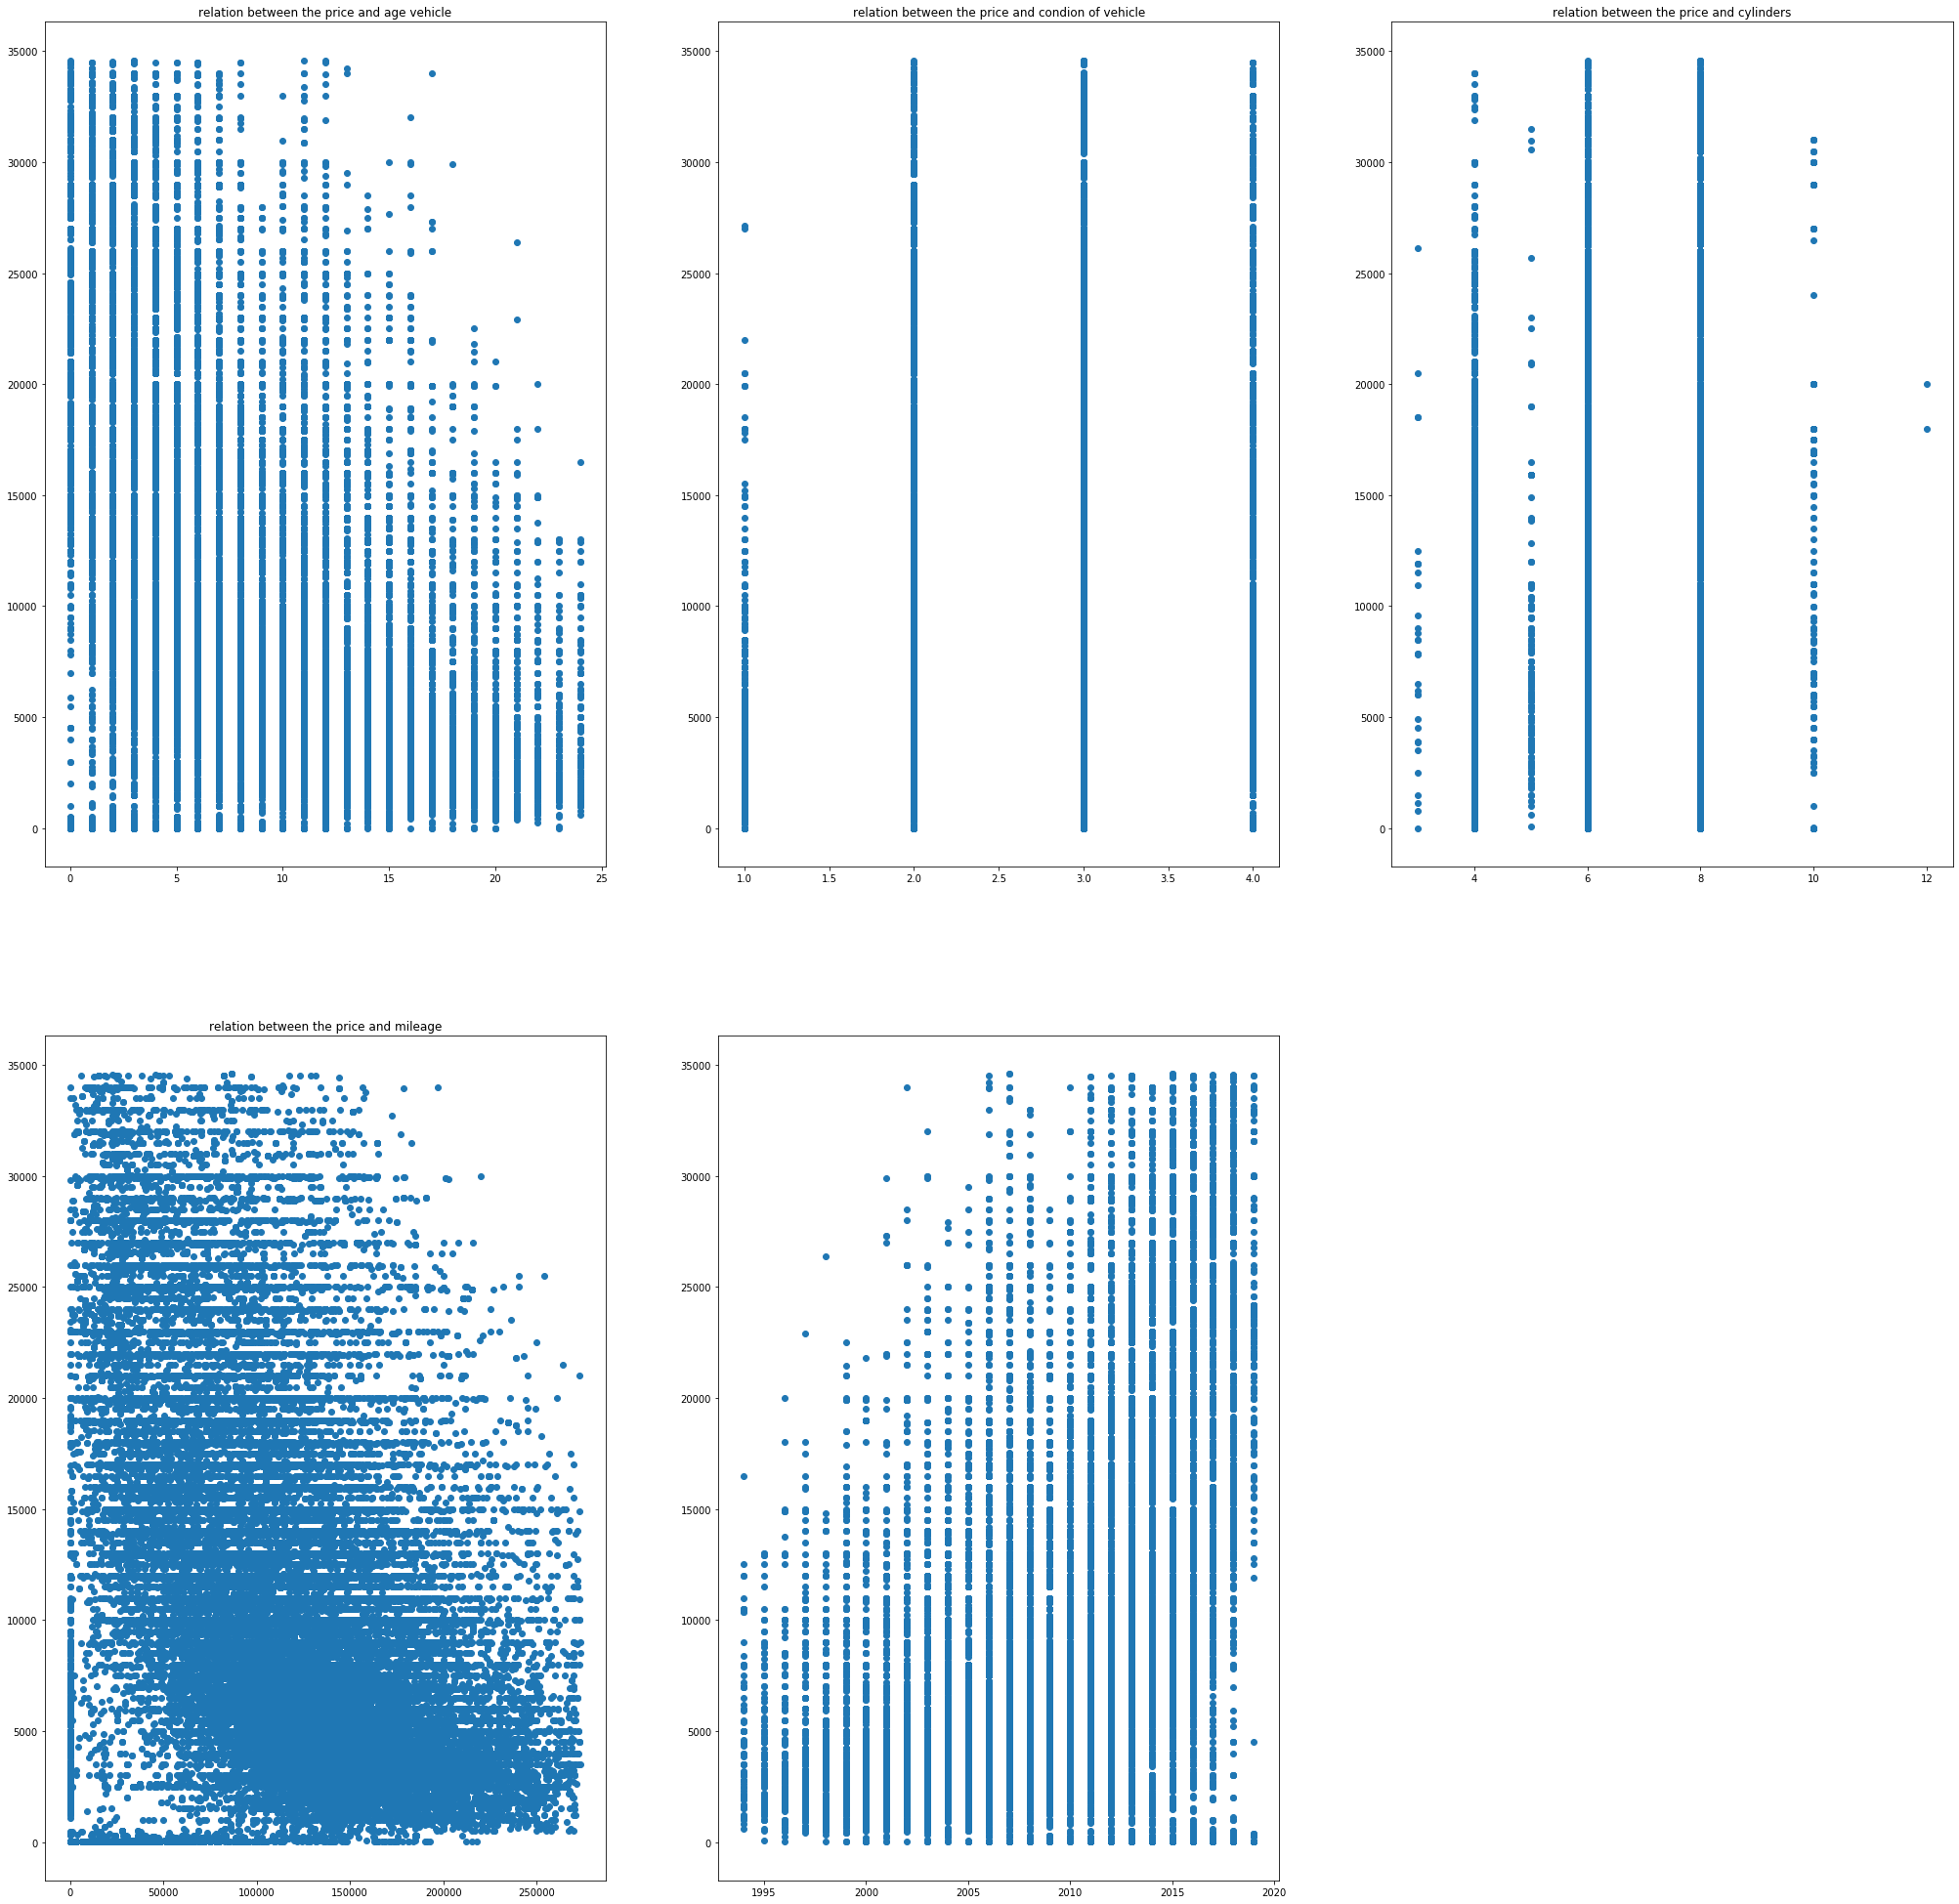

In [41]:
figure, axes = plt.subplots(3, 2,figsize=(35,35))
x = filter_table['price']

plt.subplot(2,3,1)

plt.scatter( filter_table['age_vehicle'] , x)

plt.title('relation between the price and age vehicle')
plt.subplot(2,3,2)

plt.scatter( filter_table['condition'] , x)

plt.title('relation between the price and condion of vehicle')
plt.subplot(2,3,3)

plt.scatter( filter_table['cylinders'] , x)

plt.title('relation between the price and cylinders')
plt.subplot(2,3,4)

plt.scatter( filter_table['odometer'] , x)

plt.title('relation between the price and mileage')
plt.subplot(2,3,5)


plt.scatter( filter_table['model_year'] , x)


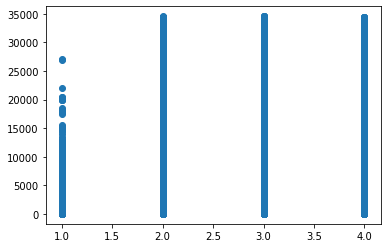

In [42]:
plt.scatter( filter_table['condition'] , x)

we have four scatterplot
- [x] relation between the price and age vehicle
- [x] relation between the price and condition 
- [x] relation between the price and cylinders
- [x] relation between the price and mileage


**relation between the price and age vehicle**


0-12 the price between 30K-35K
And then the age of th vehicale increase while the price is decreasing so we can notice as the age incresing the price decreasing


**relation between the price and cylinders**


we have different prices in each cylinder number we can notice cars with 12 cylinders price range between 17K-20K
with 3 cylinders vehicle the highest price is 26K most of them between 0-13K


**relation between the price and mileage**


we have different mileage with different prices and the skewness is taking to the right (in odometer) with decresing in the price so as we exceed 150K the price start getting in decrease for all the mileage above 150K however in each mileage we have different prices and that's logic because we are dealing with diferent types and models for each vehicle


**relation between the price and condion** 


each condition diverse in price just condition with 1 value have price range from 0-15K and the a liitle bit of vehicle are above 15K


**relation between the price and model year**

as we can see from the scatter chart model year increasing leads to increasing in the price and we have 2006-2020 the price between 30K-35K BUT we  can notice that there just a few vehicle's in 2018-2020 there price less than 15K So mybe they are fair or salvage 

# Categorized data

Boxplot for paint color and transmission with the price

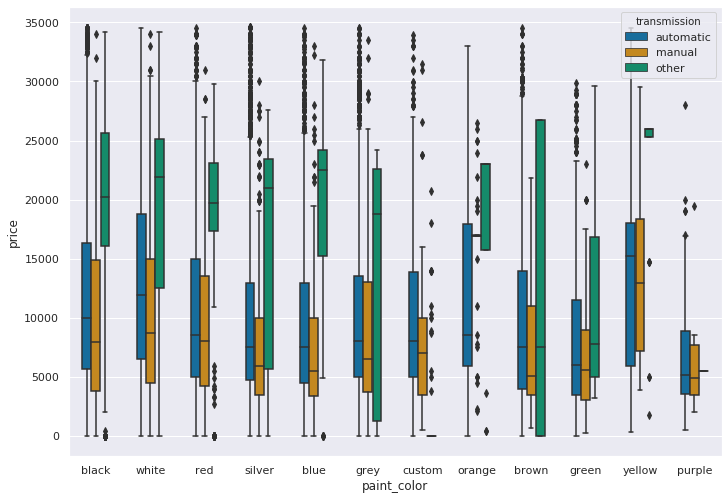

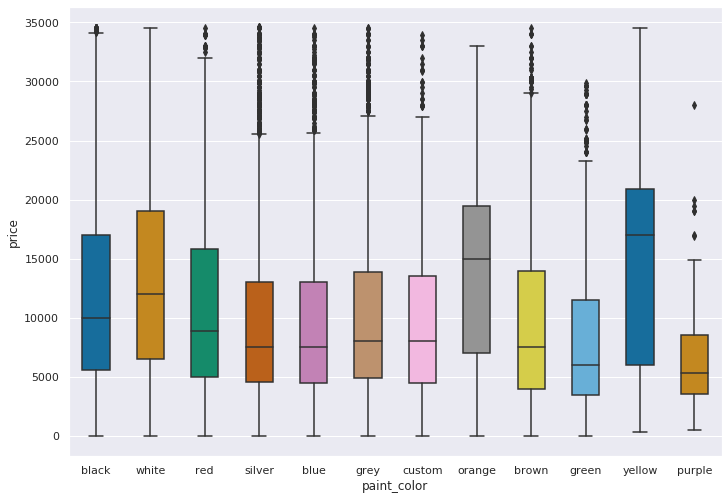

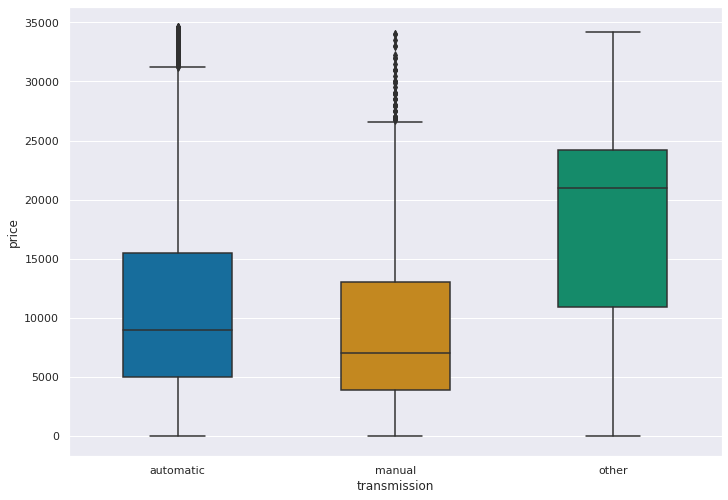

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns

#filter_table.boxplot('price') 
sns.set(rc={'figure.figsize':(11.7,8.27)})

bplot = sns.boxplot(y='price', x='paint_color', hue='transmission',
                 data=filter_table, 
                 width =0.5,palette="colorblind")
plt.show()
bplot2 = sns.boxplot(y='price', x='paint_color',
                 data=filter_table, 
                 width =0.5,
                 palette="colorblind")
plt.show()
bplot3 = sns.boxplot(y='price', x='transmission',
                 data=filter_table, 
                 width =0.5,
                 palette="colorblind")
plt.show()



we have draw three figures

1. First

gathering between the transmission and paint color in one graph and study the association with the price (y-axis)

2. Second


- other 
 <ul><li>25% : 5000
   </li><li>50% : 9000
   </li><li>75% : 16000
    </li></ul>
    
    
- white 
 <ul><li>25% : 7000
   </li><li>50% : 11000
   </li><li>75% : 18000
    </li></ul>
- red
 <ul><li>25% : 5000
   </li><li>50% : 9000
   </li><li>75% : 15000
    </li></ul>
- black 
 <ul><li>25% : 7000
   </li><li>50% : 11000
   </li><li>75% : 18000
    </li></ul>
- blue 
 <ul><li>25% : 5000
   </li><li>50% : 7500
   </li><li>75% : 14000
    </li></ul>
- grey 
 <ul><li>25% : 5000
   </li><li>50% : 8000
   </li><li>75% : 14500
    </li></ul>
- silver 
 <ul><li>25% : 5000
   </li><li>50% : 8000
   </li><li>75% : 14300
    </li></ul>
- custom 
 <ul><li>25% : 5000
   </li><li>50% : 8000
   </li><li>75% : 14300
    </li></ul>
- orange 
 <ul><li>25% : 7000
   </li><li>50% : 15000
   </li><li>75% : 19000
    </li></ul>
- yellow 
 <ul><li>25% : 6000
   </li><li>50% : 17000
   </li><li>75% : 21000
    </li></ul>
- brown 
 <ul><li>25% : 4000
   </li><li>50% : 7000
   </li><li>75% : 14000
    </li></ul>
- green 
 <ul><li>25% : 3000
   </li><li>50% : 6000
   </li><li>75% : 11000
    </li></ul>
- purple
 <ul><li>25% : 3000
   </li><li>50% : 5000
   </li><li>75% : 8500
    </li></ul>

To sum up we grouped the colors into four groups that have almost the same median 
- other , white , red , black 
the price approximately equals to **9K-11K**
- blue grey , silver, custom , brown
the price approximately equals to **8K**
- orange , yellow
the price approximately equals to **15K-18K**
- green , purple
the price approximately equals to **5K-6k**


so we can see that the rare colors have lower price than the most demands one's but we have  notice that orange and yellow have a high price because they are rare colors maybe they will be for special users

<br>***Outliers***
</br>


Most of the paint color have an outliers except
- the special color (orange and yello so our hypothesis is right the vehicale are made on a demand its mean an ordered vehicle )
- white and black 

3. Third

we have three typer of transmissin 
- auto 

     <ul><li>25% : 5000
   </li><li>50% : 9000
   </li><li>75% : 15000
    </li></ul>
      the auto type the range between 5K - 15K the price is normal despite of we have abnormal distribution we have a lot of outliers that have a price > 30000
    
- manual

    <ul><li>25% : 4000
   </li><li>50% : 7000
   </li><li>75% : 13000
    </li></ul>
    
    the manual type the range between 4K - 13K the lowest price and we have abnormal distribution we have a lot of outliers that have a price > 26000
    
- other 

    <ul><li>25% : 11000
   </li><li>50% : 21000
   </li><li>75% : 24000
    </li></ul>
    
    other have the highest price between 11K - 24K and the distribution is normal we don't have outliers

# Overall conclusion

At Crankshaft List. Hundreds of free advertisements for vehicles are published on site every day.

we studied the data collected over the last few years and determine which factors influence the price of a vehicle.
we have noticed that paint color mileage the age of the vehicle transmission,condion and the type of the vehic and the model year are main factors for affecting the vehicle's price
In the charts below you are going to see how these factors are going to affect the price 


In [44]:
paint=filter_table.pivot_table(index='paint_color' , values='price' ,aggfunc=['mean','count'])
paint.columns=['avg price','count']
paint

,avg price,count
paint_color,,
black,12118.477772,9245
blue,9686.590289,4469
brown,9953.242744,1137
custom,9625.549724,1086
green,8295.546630,1469
grey,10000.656205,5576
orange,13720.990610,213
purple,6809.956044,91
red,10834.881466,4311


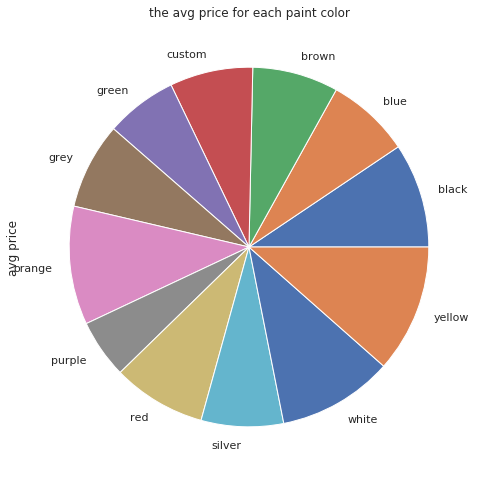

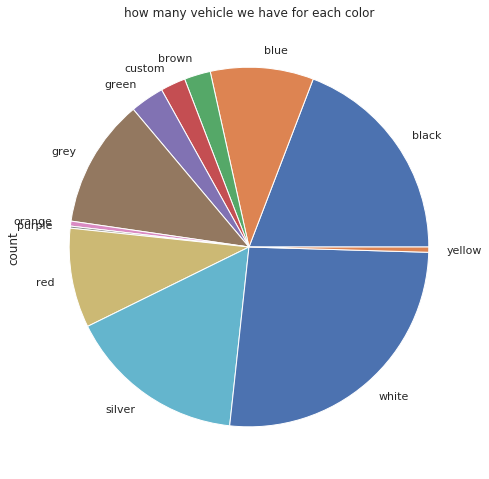

In [45]:
paint['avg price'].plot(kind='pie',y='avg price')

plt.title('the avg price for each paint color')

plt.show()

paint['count'].plot(kind='pie',y='number of vehicle')
plt.title('how many vehicle we have for each color')

plt.show()

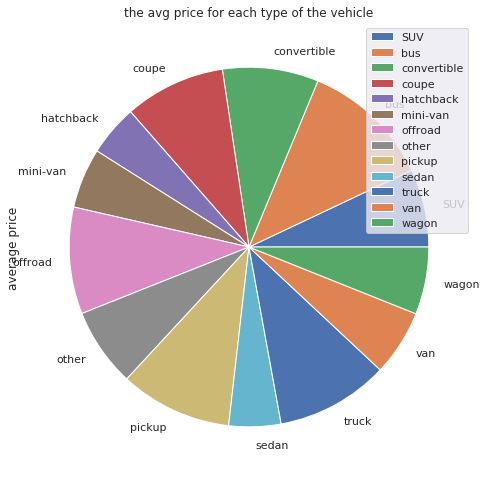

In [46]:
ad_table.plot(kind='pie',y='average price')
plt.title('the avg price for each type of the vehicle')
plt.show()

In [47]:
transmission=filter_table.pivot_table(index='transmission' , values='price' ,aggfunc=['mean','count'])
transmission.columns=['avg price','count']
print(transmission)

                 avg price  count
transmission                     
automatic     11105.949112  43979
manual         9105.727457   2462
other         17359.174412   1743


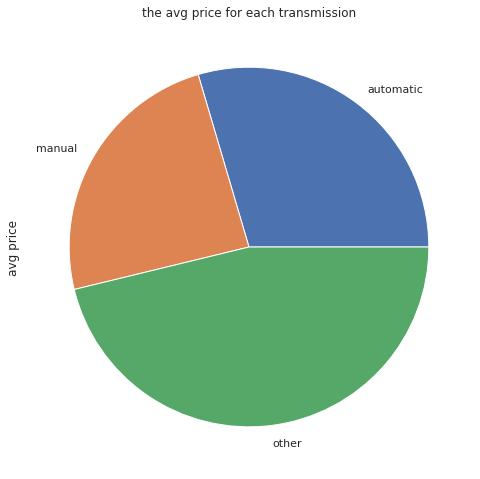

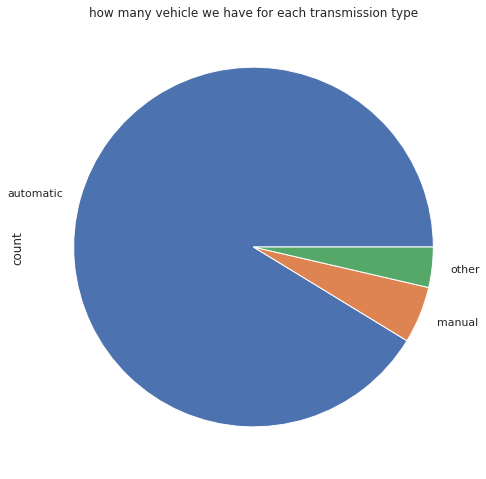

In [48]:
transmission['avg price'].plot(kind='pie',y='price')
plt.title('the avg price for each transmission')

plt.show()
transmission['count'].plot(kind='pie',y='count')
plt.title('how many vehicle we have for each transmission type')
plt.show()

                avg price  count
age_vehicle                     
0            17867.844089   1565
1            18585.363826   1913
2            17588.140460   2741
3            16789.717545   3243
4            15104.582868   3759
5            13373.003074   3904
6            11839.636316   3778
7            11395.856910   3683
8            10158.406018   2958
9             8496.948899   2407
10            8788.926430   2868
11            8218.064187   3038
12            7876.913786   2517
13            6918.390043   2069
14            6644.551611   1831
15            6021.705298   1510
16            6011.342618   1077
17            5457.567661    872
18            4940.670103    679
19            5020.807207    555
20            4669.745636    401
21            4976.460317    315
22            4875.237864    206
23            4365.636364    154
24            4801.184397    141


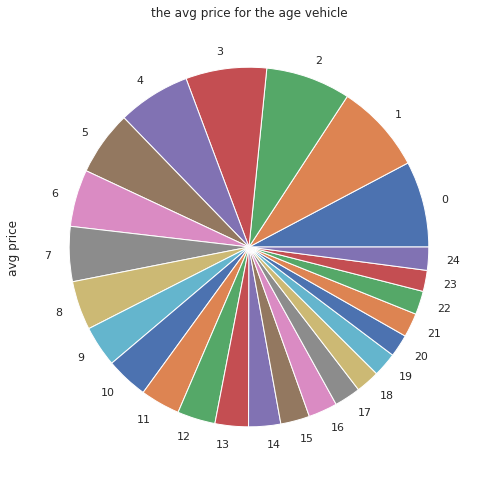

In [49]:
age=filter_table.pivot_table(index='age_vehicle',values='price',aggfunc=['mean','count'])
age.columns=['avg price','count']
print(age)
age['avg price'].plot(kind='pie',y='price')
plt.title('the avg price for the age vehicle')

plt.show()


               avg price  count
model_year                     
1994         4934.744186     86
1995         4394.218935    169
1996         4797.602484    161
1997         4971.351792    307
1998         4420.019608    357
1999         5425.496894    483
2000         4745.193353    662
2001         5209.524778    787
2002         5667.855236    974
2003         6123.131673   1405
2004         6552.242460   1691
2005         6320.917976   2036
2006         7991.504693   2344
2007         7976.947188   2916
2008         8858.488689   3227
2009         8191.129226   2159
2010         9308.691282   2776
2011        11367.904668   3556
2012        11493.923446   3749
2013        12855.926511   3987
2014        14537.354200   3738
2015        16507.740720   3529
2016        17272.177330   2876
2017        18375.645558   2274
2018        18174.609319   1674
2019        18267.268199    261


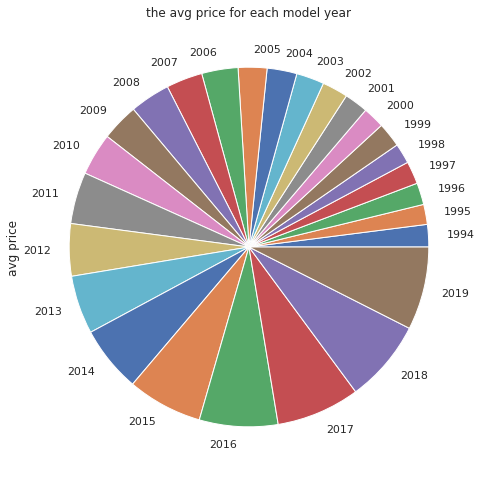

In [50]:
model=filter_table.pivot_table(index='model_year',values='price',aggfunc=['mean','count'])
model.columns=['avg price','count']
print(model)

model['avg price'].plot(kind='pie',y='price')
plt.title('the avg price for each model year')

plt.show()



              avg price  count
condition                     
1           3353.571220   1369
2          10534.417674  19101
3          11735.867741  23454
4          14094.339202   4260


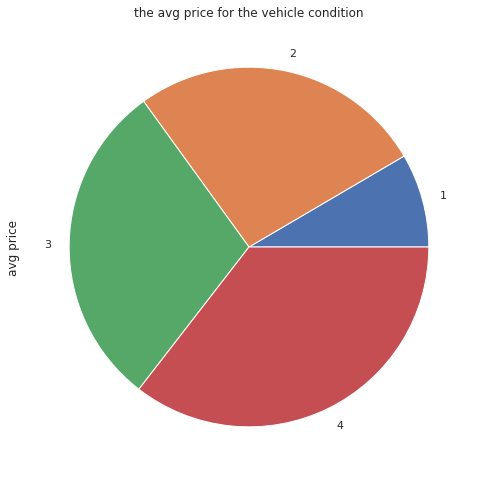

In [51]:
condition=filter_table.pivot_table(index='condition',values='price',aggfunc=['mean','count'])
condition.columns=['avg price','count']
print(condition)

condition['avg price'].plot(kind='pie',y='price')
plt.title('the avg price for the vehicle condition')

plt.show()


- paint color 
   - white and black have normal price 
   - rare colors lower price 
   - special color for special users have high price


- transmission ( manual < auto < other )
  - manual --> low price
  - auto ----> normal price
  - other ---> high price
- age vehical 
neagtive correlation high price --> low 
- model year 
the modern the vehicle version the higher price it will be 